In [6]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob

from utils.plotter import Plotter
from utils.data_handler import DataHandler

labels = ["bias"]
root = lambda x, y: f"./output_{x}/work{y}/"
n_works = len(glob(root(labels[0], "*")))
template = lambda x, y: f"{root(x, y)}/output/"
data_folder = lambda x: template(labels[0], x)
noise_file = lambda x: f"{root(labels[0], x)}/airpressure_noise.nc"
folder = data_folder(0)
output_folder = "figs"

obs_file = lambda x: f"./stochObserver/synthetic_noos_data/timeseries_20130101_20140101_{x}_averaged.noos"
av_file = "full_DCSM-FM_0_5nm_averaged_0000_his.nc"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

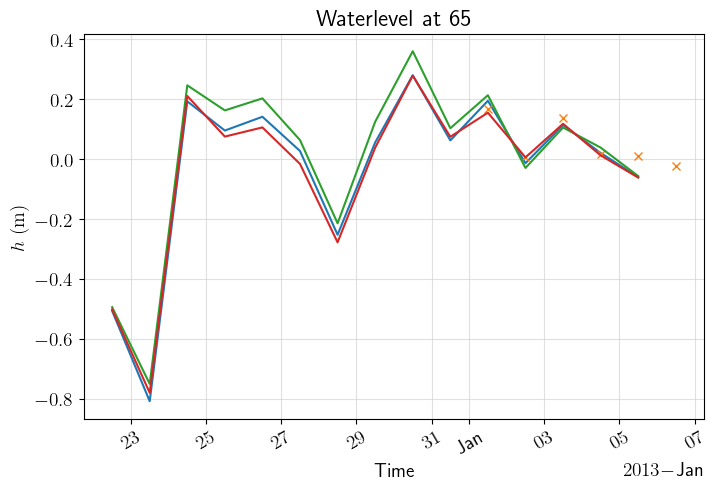

In [8]:
stations = range(1)
station_names = ["ABDN"]
for station in stations:
    title_func = lambda s: f"Waterlevel at {s}"
    ts = []
    ws = []
    works = list(range(n_works))
    works = [str(x) for x in works]
    for work in works:
        file = os.path.join(data_folder(work), av_file)
        nc_his = xr.load_dataset(file)
        station_data = nc_his.isel(stations=station)
        ts.append(station_data.time)
        loc_name = nc_his.station_name[station].item()[0]
        ws.append(station_data.waterlevel)

    # Observations
    observations = DataHandler.read_noos(obs_file(station_names[0]), s=slice(None, 6))
    Plotter.plot_series(
        ts,
        ws,
        loc_name,
        title_func,
        obs_data=observations,
    )
    plt.show()